In [51]:
%load_ext autoreload
%autoreload 2
from model.model import OpinionModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
my_model = OpinionModel(num_agents=200,
                        mu=0.5,
                        init_u=1.2, extremist_ratio=0.25, d=.0, 
                        extremist_u=0.1, regime="all",
                        max_iter=1e+5,
                        eps=1e-4
                       )

In [53]:
my_model.schedule._agents[0].x

-0.998856207744113

In [54]:
my_model.run_model()

Elapsed 0 steps
Elapsed 100 steps
Elapsed 200 steps


In [55]:
my_model.schedule._agents[0].x

-0.8655415823786146

In [120]:
set(my_model.datacollector.get_agent_vars_dataframe().tail(200)['Opinion'].apply(lambda x: round(x, 2)))

{-0.9, 0.0, 0.9}

In [121]:
my_model.schedule.steps

262

In [122]:
import numpy as np

In [123]:
my_model.get_clusters()

{-0.9: 109, 0.0: 2, 0.9: 89}

In [124]:
my_model.check_clusters_convergence()

0.49564444444444455

In [125]:
import seaborn as sns

In [65]:
opinions = my_model.datacollector.get_agent_vars_dataframe().reset_index()
opinions['cluster'] = opinions['Uncertainty'].apply(lambda x: round(x, 1))

In [70]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def plot_opinions(model: OpinionModel):
    cmap = LinearSegmentedColormap.from_list("rg", ["red", "yellow", "yellow", "lime"])

    opinions = model.datacollector.get_agent_vars_dataframe().reset_index()
    plt.figure(figsize=(15, 6))
    plot = plt.scatter(
        opinions.Step, opinions.Opinion, c=opinions.Uncertainty, cmap=cmap
    )
    plt.clf()
    plt.colorbar(plot, label="Uncertainty")
    sns.lineplot(
        data=opinions,
        x="Step",
        y="Opinion",
        hue="Uncertainty",
        palette=cmap,
        legend=None,
        size=3,
        marker=",",
    )

In [ ]:
plot_opinions(my_model)

/var/folders/fd/wgp9jk8x1msd6_yg7qnrxj0r0000gn/T/ipykernel_69362/1398693586.py:13: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(plot, label="Uncertainty")


<AxesSubplot:xlabel='Step', ylabel='Opinion'>

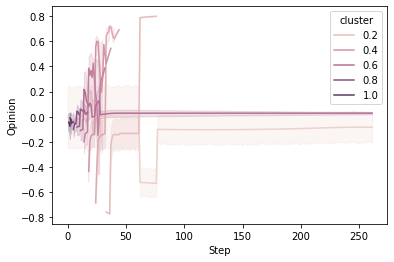

In [64]:
import seaborn as sns
sns.lineplot(data=opinions, x='Step', y='Opinion', hue="cluster")

In [16]:
df = my_model.datacollector.get_agent_vars_dataframe().reset_index()

In [17]:
df[df['AgentID'] == 10]

,Step,AgentID,Opinion,Uncertainty,Delta X,Delta U
10,0,10,-0.818181,0.5,0,0


In [86]:
from mesa.batchrunner import batch_run

In [ ]:
params = {
    num_agents: [1000],
    mu=[],
    init_u=0.5, extremist_ratio=0.3, d=0.2, 
    extremist_u=0.05, regime="p2p",
    max_iter=1e+5,
    eps=1e-8
}

In [ ]:
batch_run(OpinionModel, )